## Roofline model

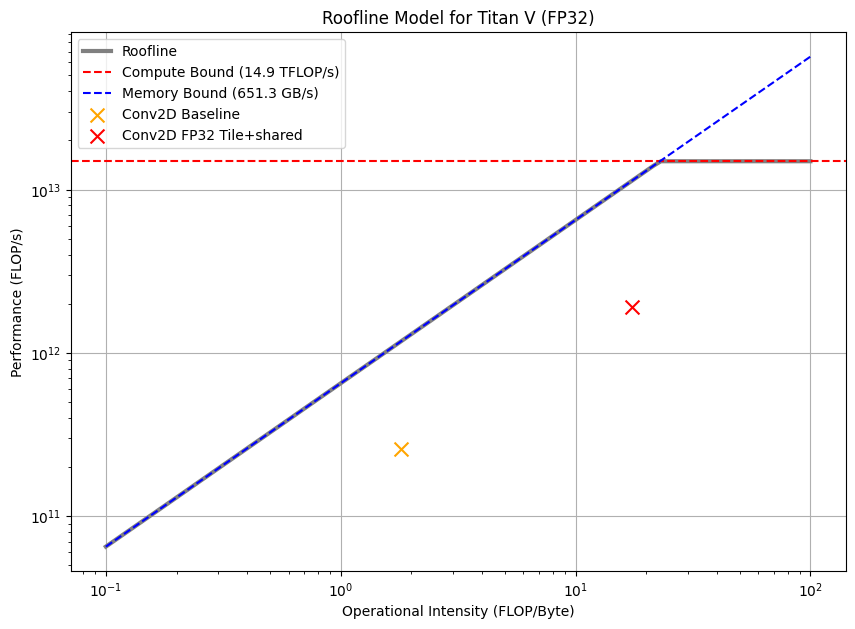

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Titan V hardware limits
peak_compute_fp16 = 14.9e12  # 14.9 TFLOP/s
peak_bandwidth = 651.3e9    # 651.3 GB/s

# Kernel Data (assuming FP16 used throughout for simplicity)
kernels = [
    {
        "label": "Conv2D Baseline",
        "flops": 5.8138e+10,
        "runtime_ms": 224.382,
        "dram_bw": 143.41
    },
    {
        "label": "Conv2D FP32 Tile+shared",
        "flops": 2.9331e+10,
        "runtime_ms": 17.330,
        "dram_bw": 202.87
    },
]

# Compute OI and Performance
oi = []
perf = []
labels = []

for k in kernels:
    runtime_s = k["runtime_ms"] / 1000
    bytes_moved = k["dram_bw"] * runtime_s * 1e9  # GB/s to bytes
    operational_intensity = k["flops"] / bytes_moved
    achieved_perf = k["flops"] / runtime_s
    oi.append(operational_intensity)
    perf.append(achieved_perf)
    labels.append(k["label"])

# Plot Roofline
oi_range = np.logspace(-1, 2, 100)
roofline_mem = peak_bandwidth * oi_range
roofline_compute = np.full_like(oi_range, peak_compute_fp16)

plt.figure(figsize=(10, 7))
plt.loglog(oi_range, np.minimum(roofline_mem, roofline_compute), label='Roofline', linewidth=3, color='gray')
plt.axhline(y=peak_compute_fp16, color='red', linestyle='--', label='Compute Bound (14.9 TFLOP/s)')
plt.plot(oi_range, roofline_mem, linestyle='--', color='blue', label='Memory Bound (651.3 GB/s)')

# Plot kernel points
colors = ['orange', 'red', 'blue']
for i in range(len(kernels)):
    plt.scatter(oi[i], perf[i], label=labels[i], s=100, color=colors[i], marker='x')

# Labels and formatting
plt.xlabel('Operational Intensity (FLOP/Byte)')
plt.ylabel('Performance (FLOP/s)')
plt.title('Roofline Model for Titan V (FP32)')
plt.legend()
plt.grid(True)
plt.show()
